In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# Creating Sample Data

In [2]:
# Creating dataset
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, n_features=4, cluster_std=3)

In [3]:
# Converting to dataframe
df = pd.DataFrame(X)

target = pd.Series(y)

In [4]:
# Getting random number
rand_num = np.random.randint(0, 100)
rand_num

21

In [5]:
# Getting data point from dataframe and its class
point = df.iloc[rand_num]
t_point = target.iloc[rand_num]

# Removing data point from dataframe
df.drop(rand_num, inplace=True)
target.drop(rand_num, inplace=True)

# Class of data point
t_point

0

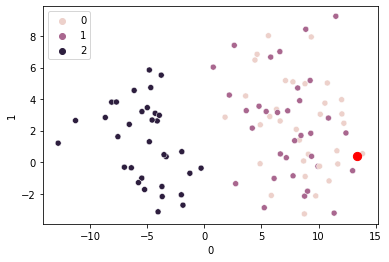

In [6]:
# Plotting whole dataset
sns.scatterplot(x=df[0], y=df[1], hue=target)

# Plotting our data point
plt.scatter(point[0], point[1], c="r", s=68);

# My KNN implementation

In [7]:
# Euclidean distance
dist = (df - point) ** 2
dist

,0,1,2,3
0,313.275590,7.247637,43.765048,175.779955
1,56.742102,6.346109,3.424143,0.464675
2,346.988788,4.598153,1.224162,348.731356
3,355.646000,7.838677,1.190366,379.939310
4,237.428359,6.139468,14.443613,497.178430
...,...,...,...,...
95,13.248787,6.490375,8.184646,33.647215
96,48.849619,7.527316,140.280074,107.811703
97,60.599264,57.923647,0.938740,18.124968
98,322.816987,5.125197,42.736961,197.909089


In [8]:
# Summing up columns for each row
euc_dist = dist.sum(axis=1)
euc_dist

0     540.068230
1      66.977029
2     701.542460
3     744.614353
4     755.189871
         ...    
95     61.571023
96    304.468712
97    137.586619
98    568.588234
99     82.734294
Length: 99, dtype: float64

In [9]:
# Sorting values of closest neighbours
neighbours = target[euc_dist.sort_values().index]
neighbours

10    0
63    0
19    0
61    0
92    0
     ..
9     2
29    2
66    2
65    2
69    2
Length: 99, dtype: int32

In [10]:
# Reseting index
neighbours = neighbours.reset_index(drop=True)
neighbours

0     0
1     0
2     0
3     0
4     0
     ..
94    2
95    2
96    2
97    2
98    2
Length: 99, dtype: int32

In [11]:
# Getting K closest neighbours
K = 5

K_neighbours = neighbours[:K]

In [12]:
# Checking most common item in Series
from collections import Counter

counter = Counter(K_neighbours)
result = counter.most_common()[0][0]
result

0

# Comparing with KNN from sklearn

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier()

In [15]:
knn.fit(df, target)

KNeighborsClassifier()

In [16]:
knn.predict([point])[0]

0